In [1]:

from matplotlib import style

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
style.available
style.use('fivethirtyeight')

In [2]:
import numpy as np
import pandas as pd

In [3]:

import datetime 
from werkzeug.wrappers import Request, Response



# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy import create_engine, inspect, Column, Integer, String
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
from sqlalchemy.sql import func
from flask import Flask, jsonify

In [5]:
# Choose start and end date of trip - must be 3-15 days in total
# Start date - 2/2/17
# End date - 2/15/17

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
file_name = 'hawaii_measurements.csv'
clean_him_df = pd.read_csv(file_name)
clean_him_df.to_sql(con=engine, name='measurements', if_exists='replace')

file_name2 = 'hawaii_stations.csv'
clean_hs_df = pd.read_csv(file_name2)
clean_hs_df.to_sql(con=engine, name='stations', if_exists='replace')

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:

list(Measurement.__table__.columns)

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

# Precipitation Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data.
measurements_query = (session
                      .query(Measurement.station,
                             Measurement.date, 
                             Measurement.prcp,
                             Measurement.tobs)
                      .filter(Measurement.date <= '2017-08-23')
                      .filter(Measurement.date >= '2016-08-23')
                      .all())


for row in measurements_query:
    print(row)

('USC00519397', '2016-08-23', 0.0, 81.0)
('USC00519397', '2016-08-24', 0.08, 79.0)
('USC00519397', '2016-08-25', 0.08, 80.0)
('USC00519397', '2016-08-26', 0.0, 79.0)
('USC00519397', '2016-08-27', 0.0, 77.0)
('USC00519397', '2016-08-28', 0.01, 78.0)
('USC00519397', '2016-08-29', 0.0, 78.0)
('USC00519397', '2016-08-30', 0.0, 79.0)
('USC00519397', '2016-08-31', 0.13, 80.0)
('USC00519397', '2016-09-01', 0.0, 81.0)
('USC00519397', '2016-09-02', 0.0, 80.0)
('USC00519397', '2016-09-03', 0.0, 79.0)
('USC00519397', '2016-09-04', 0.03, 75.0)
('USC00519397', '2016-09-05', None, 79.0)
('USC00519397', '2016-09-06', None, 76.0)
('USC00519397', '2016-09-07', 0.05, 76.0)
('USC00519397', '2016-09-08', 0.0, 80.0)
('USC00519397', '2016-09-09', 0.03, 79.0)
('USC00519397', '2016-09-10', 0.0, 78.0)
('USC00519397', '2016-09-11', 0.05, 76.0)
('USC00519397', '2016-09-12', 0.0, 78.0)
('USC00519397', '2016-09-13', 0.02, 78.0)
('USC00519397', '2016-09-14', 1.32, 75.0)
('USC00519397', '2016-09-15', 0.42, 79.0)
('U

('USC00519281', '2017-05-16', 0.03, 74.0)
('USC00519281', '2017-05-17', 0.07, 74.0)
('USC00519281', '2017-05-18', 0.13, 69.0)
('USC00519281', '2017-05-19', 0.01, 68.0)
('USC00519281', '2017-05-20', 0.02, 76.0)
('USC00519281', '2017-05-21', 0.01, 74.0)
('USC00519281', '2017-05-22', 0.06, 71.0)
('USC00519281', '2017-05-23', 0.06, 71.0)
('USC00519281', '2017-05-24', 0.3, 74.0)
('USC00519281', '2017-05-25', 0.2, 74.0)
('USC00519281', '2017-05-26', 0.0, 74.0)
('USC00519281', '2017-05-27', 0.0, 74.0)
('USC00519281', '2017-05-28', 0.08, 80.0)
('USC00519281', '2017-05-29', 0.4, 74.0)
('USC00519281', '2017-05-30', 1.12, 72.0)
('USC00519281', '2017-05-31', 0.25, 75.0)
('USC00519281', '2017-06-01', 0.0, 80.0)
('USC00519281', '2017-06-02', 0.09, 76.0)
('USC00519281', '2017-06-03', 0.08, 76.0)
('USC00519281', '2017-06-04', 0.13, 77.0)
('USC00519281', '2017-06-05', 0.05, 75.0)
('USC00519281', '2017-06-06', 0.0, 75.0)
('USC00519281', '2017-06-07', 0.0, 75.0)
('USC00519281', '2017-06-08', 0.0, 75.0)
(

In [14]:
# Select only the `date` and `prcp` values.
measurements_query = (session
                      .query(Measurement.date, 
                             Measurement.prcp)
                      .filter(Measurement.date <= '2017-08-23')
                      .filter(Measurement.date >= '2016-08-23')
                      .all())

for row in measurements_query:
    print(row)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2017-05-15', 0.08)
('2017-05-16', 0.03)
('2017-05-17', 0.02)
('2017-05-18', 0.09)
('2017-05-19', 0.02)
('2017-05-20', 0.0)
('2017-05-21', 0.0)
('2017-05-22', 0.0)
('2017-05-23', 0.02)
('2017-05-24', 0.58)
('2017-05-25', 0.37)
('2017-05-26', 0.02)
('2017-05-27', 0.0)
('2017-05-28', 0.29)
('2017-05-29', 0.02)
('2017-05-30', 0.2)
('2017-05-31', 0.1)
('2017-06-01', 0.03)
('2017-06-02', 0.1)
('2017-06-03', 0.2)
('2017-06-04', 0.15)
('2017-06-05', 0.0)
('2017-06-06', 0.0)
('2017-06-07', 0.0)
('2017-06-08', 0.02)
('2017-06-09', 0.02)
('2017-06-10', 0.21)
('2017-06-11', 0.24)
('2017-06-12', 0.19)
('2017-06-13', 0.36)
('2017-06-14', 0.27)
('2017-06-15', 0.17)
('2017-06-16', 0.02)
('2017-06-17', 0.35)
('2017-06-18', 0.25)
('2017-06-19', 0.05)
('2017-06-20', 0.05)
('2017-06-21', 0.02)
('2017-06-22', 0.1)
('2017-06-23', 0.0)
('2017-06-24', 0.0)
('2017-06-25', 0.08)
('2017-06-26', 0.02)
('2017-06-27', 0.0)
('2017-06-28', 0.01)
('2017-06-29', 0.03)
('2017-06-30', 0.04)
('2017-07-01', 0.06)
('2017-

('2017-01-21', 0.03)
('2017-01-22', 0.09)
('2017-01-23', 0.01)
('2017-01-24', 0.13)
('2017-01-25', 0.79)
('2017-01-26', 0.0)
('2017-01-27', 0.03)
('2017-01-28', 0.0)
('2017-01-29', 0.26)
('2017-01-30', 0.0)
('2017-01-31', 0.0)
('2017-02-01', 0.0)
('2017-02-02', 0.0)
('2017-02-03', 0.0)
('2017-02-04', 0.0)
('2017-02-05', 0.0)
('2017-02-06', 0.18)
('2017-02-07', 1.32)
('2017-02-08', 0.0)
('2017-02-09', 0.0)
('2017-02-10', 0.0)
('2017-02-11', 1.73)
('2017-02-12', 2.98)
('2017-02-13', 0.01)
('2017-02-14', 0.0)
('2017-02-15', 0.01)
('2017-02-16', 0.73)
('2017-02-17', 0.13)
('2017-02-18', 0.0)
('2017-02-19', 0.09)
('2017-02-20', 0.0)
('2017-02-21', 0.0)
('2017-02-22', 0.06)
('2017-02-23', 0.0)
('2017-02-24', 0.0)
('2017-02-25', 0.0)
('2017-02-26', 0.0)
('2017-02-27', 0.0)
('2017-02-28', 0.04)
('2017-03-01', 2.12)
('2017-03-02', 1.88)
('2017-03-03', 0.27)
('2017-03-04', 0.0)
('2017-03-05', 0.41)
('2017-03-06', 0.03)
('2017-03-07', 0.0)
('2017-03-08', 0.0)
('2017-03-09', 0.65)
('2017-03-10', 0

('2017-07-04', 0.0)
('2017-07-05', 0.0)
('2017-07-06', 0.02)
('2017-07-07', 0.3)
('2017-07-08', 0.02)
('2017-07-09', 0.0)
('2017-07-10', 0.02)
('2017-07-11', 0.0)
('2017-07-12', 0.05)
('2017-07-13', 0.68)
('2017-07-14', 0.68)
('2017-07-15', 0.1)
('2017-07-16', 0.5)
('2017-07-17', 0.39)
('2017-07-18', 2.4)
('2017-07-19', 0.27)
('2017-07-20', 0.7)
('2017-07-21', 0.1)
('2017-07-22', 4.0)
('2017-07-23', 0.8)
('2017-07-24', 0.84)
('2017-07-25', 0.3)
('2017-07-26', 0.3)
('2017-07-27', 0.0)
('2017-07-28', 0.4)
('2017-07-29', 0.3)
('2017-07-30', 0.3)
('2017-07-31', 0.0)
('2017-08-01', None)
('2017-08-02', 0.25)
('2017-08-03', 0.06)
('2017-08-05', None)
('2017-08-06', None)
('2017-08-07', 0.05)
('2017-08-08', 0.34)
('2017-08-09', 0.15)
('2017-08-10', 0.07)
('2017-08-11', None)
('2017-08-12', 0.14)
('2017-08-13', None)
('2017-08-14', 0.22)
('2017-08-15', 0.42)
('2017-08-16', 0.42)
('2017-08-17', 0.13)
('2017-08-18', None)
('2017-08-19', 0.09)
('2017-08-20', None)
('2017-08-21', 0.56)
('2017-08-2

In [15]:
# Load the query results into a Pandas DataFrame and set the index to the date column.

mq_df = pd.DataFrame(measurements_query, columns=['date', 'prcp'])


mq_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [16]:
# Sort the DataFrame values by `date`
#mq_df = pd.DataFrame(measurements_query, columns=['date', 'prcp'])
#mq_df = mq_df.sort_values(by=['date'])

#mq_df.set_index('date', inplace=True)
#mq_df.head()

In [17]:
# Unpack 'prcp' column into own list

prcp_result = mq_df['prcp']

# Unpack 'date' column into own list

date_result = mq_df['date']


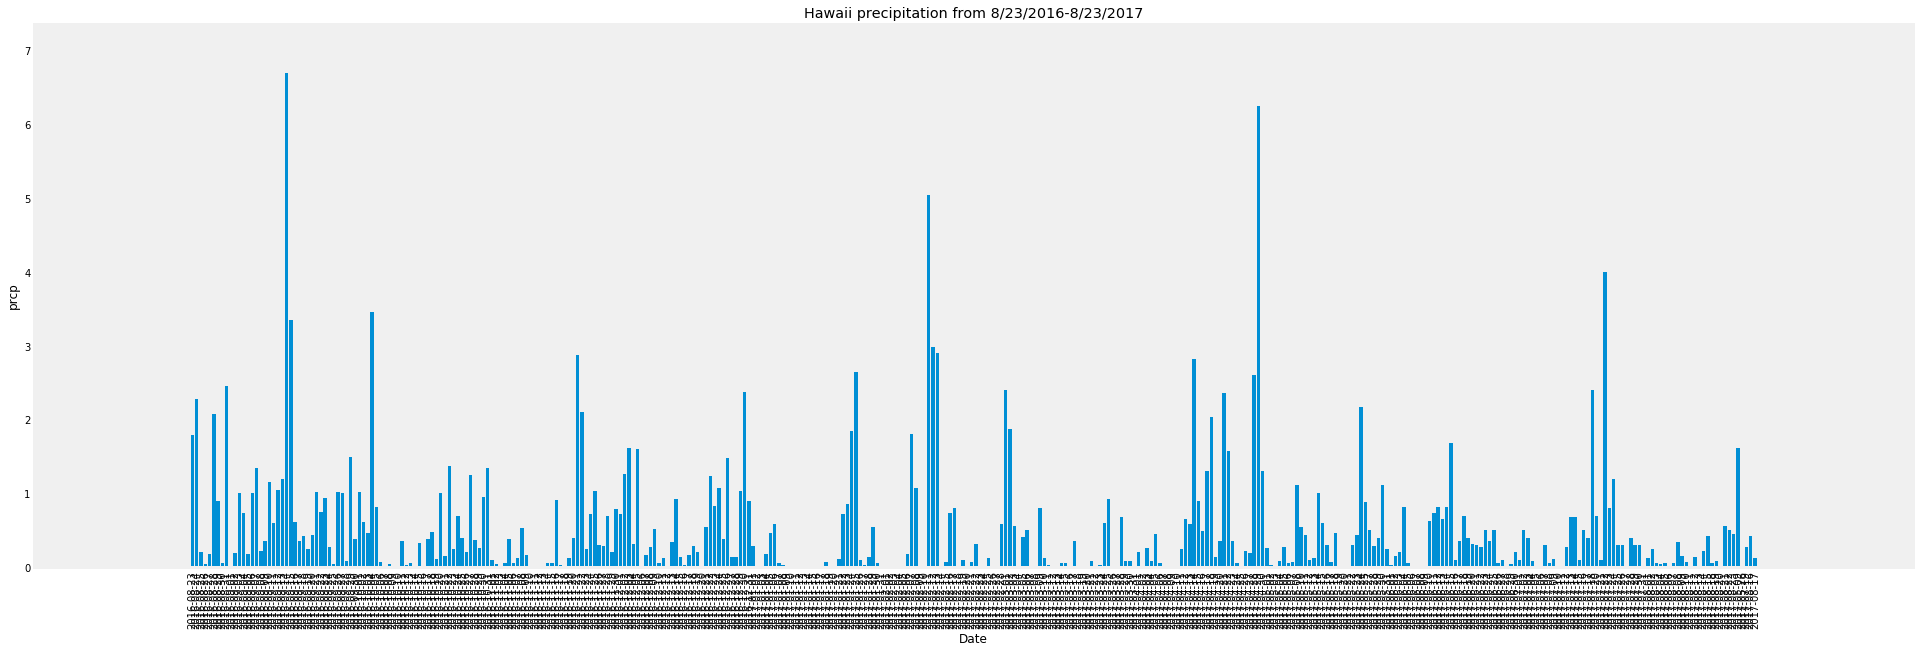

<Figure size 432x288 with 0 Axes>

In [18]:
# Plot 'date' vs 'prcp'

plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
plt.bar(date_result, prcp_result)
plt.xlabel('Date')
plt.ylabel('prcp')
plt.margins(0.1)
plt.title('Hawaii precipitation from 8/23/2016-8/23/2017')
plt.grid()
plt.show()
plt.savefig("Images/precipitation_analysis.png")

In [19]:
#Use Pandas to print the summary statistics for the precipitation data.
mq_df.describe(percentiles=None, include=None, exclude=None)

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
stations = Base.classes.station

list(stations.__table__.columns)

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [21]:
#Design a query to calculate the total number of stations.

# Calculate total number of stations
stations_count = (session
                  .query(stations.station)
                  .count())
stations_count

9

In [22]:
#Design a query to find the most active stations.
# list by station and counts by descending order
# Which station has the highest number of observations?
active_stations = (session
                   .query(Measurement.station, func.count(Measurement.date))
                   .order_by(func.count(Measurement.date).desc())
                   .group_by(Measurement.station)
                   .all())
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
tobs_query = (session
              .query(Measurement.date, 
                     Measurement.station,
                     Measurement.tobs)
              .filter(Measurement.date <= '2017-08-23')
              .filter(Measurement.date >= '2016-08-23')
              .order_by(Measurement.date)
              .all())

for row in tobs_query:
    print(row)

('2016-08-23', 'USC00519397', 81.0)
('2016-08-23', 'USC00513117', 76.0)
('2016-08-23', 'USC00514830', 80.0)
('2016-08-23', 'USC00517948', 80.0)
('2016-08-23', 'USC00519523', 80.0)
('2016-08-23', 'USC00519281', 77.0)
('2016-08-23', 'USC00516128', 74.0)
('2016-08-24', 'USC00519397', 79.0)
('2016-08-24', 'USC00513117', 76.0)
('2016-08-24', 'USC00514830', 80.0)
('2016-08-24', 'USC00517948', 78.0)
('2016-08-24', 'USC00519523', 79.0)
('2016-08-24', 'USC00519281', 77.0)
('2016-08-24', 'USC00516128', 74.0)
('2016-08-25', 'USC00519397', 80.0)
('2016-08-25', 'USC00513117', 77.0)
('2016-08-25', 'USC00514830', 81.0)
('2016-08-25', 'USC00517948', 81.0)
('2016-08-25', 'USC00519523', 80.0)
('2016-08-25', 'USC00519281', 80.0)
('2016-08-25', 'USC00516128', 77.0)
('2016-08-26', 'USC00519397', 79.0)
('2016-08-26', 'USC00513117', 78.0)
('2016-08-26', 'USC00514830', 81.0)
('2016-08-26', 'USC00517948', 81.0)
('2016-08-26', 'USC00519523', 84.0)
('2016-08-26', 'USC00519281', 80.0)
('2016-08-27', 'USC00519397'

('2017-06-26', 'USC00519281', 73.0)
('2017-06-26', 'USC00516128', 79.0)
('2017-06-27', 'USC00519397', 80.0)
('2017-06-27', 'USC00513117', 77.0)
('2017-06-27', 'USC00517948', 80.0)
('2017-06-27', 'USC00519523', 81.0)
('2017-06-27', 'USC00519281', 76.0)
('2017-06-27', 'USC00516128', 74.0)
('2017-06-28', 'USC00519397', 79.0)
('2017-06-28', 'USC00513117', 77.0)
('2017-06-28', 'USC00517948', 80.0)
('2017-06-28', 'USC00519523', 79.0)
('2017-06-28', 'USC00519281', 77.0)
('2017-06-28', 'USC00516128', 74.0)
('2017-06-29', 'USC00519397', 79.0)
('2017-06-29', 'USC00513117', 76.0)
('2017-06-29', 'USC00514830', 76.0)
('2017-06-29', 'USC00517948', 79.0)
('2017-06-29', 'USC00519523', 78.0)
('2017-06-29', 'USC00519281', 76.0)
('2017-06-29', 'USC00516128', 76.0)
('2017-06-30', 'USC00519397', 75.0)
('2017-06-30', 'USC00513117', 74.0)
('2017-06-30', 'USC00514830', 81.0)
('2017-06-30', 'USC00517948', 74.0)
('2017-06-30', 'USC00519523', 75.0)
('2017-06-30', 'USC00519281', 76.0)
('2017-06-30', 'USC00516128'

In [24]:
#Filter by the station with the highest number of observations.
tobs_querymax = (session
              .query(Measurement.date, 
                     Measurement.station,
                     Measurement.tobs)
              .filter(Measurement.date <= '2017-08-23')
              .filter(Measurement.date >= '2016-08-23')
              .order_by(func.count(Measurement.date).desc())
              .group_by(Measurement.station)
              .all())

for row in tobs_query:
    print(row)

('2016-08-23', 'USC00519397', 81.0)
('2016-08-23', 'USC00513117', 76.0)
('2016-08-23', 'USC00514830', 80.0)
('2016-08-23', 'USC00517948', 80.0)
('2016-08-23', 'USC00519523', 80.0)
('2016-08-23', 'USC00519281', 77.0)
('2016-08-23', 'USC00516128', 74.0)
('2016-08-24', 'USC00519397', 79.0)
('2016-08-24', 'USC00513117', 76.0)
('2016-08-24', 'USC00514830', 80.0)
('2016-08-24', 'USC00517948', 78.0)
('2016-08-24', 'USC00519523', 79.0)
('2016-08-24', 'USC00519281', 77.0)
('2016-08-24', 'USC00516128', 74.0)
('2016-08-25', 'USC00519397', 80.0)
('2016-08-25', 'USC00513117', 77.0)
('2016-08-25', 'USC00514830', 81.0)
('2016-08-25', 'USC00517948', 81.0)
('2016-08-25', 'USC00519523', 80.0)
('2016-08-25', 'USC00519281', 80.0)
('2016-08-25', 'USC00516128', 77.0)
('2016-08-26', 'USC00519397', 79.0)
('2016-08-26', 'USC00513117', 78.0)
('2016-08-26', 'USC00514830', 81.0)
('2016-08-26', 'USC00517948', 81.0)
('2016-08-26', 'USC00519523', 84.0)
('2016-08-26', 'USC00519281', 80.0)
('2016-08-27', 'USC00519397'

('2017-05-12', 'USC00519523', 77.0)
('2017-05-12', 'USC00519281', 75.0)
('2017-05-12', 'USC00516128', 70.0)
('2017-05-13', 'USC00519397', 79.0)
('2017-05-13', 'USC00513117', 75.0)
('2017-05-13', 'USC00519523', 76.0)
('2017-05-13', 'USC00519281', 76.0)
('2017-05-13', 'USC00516128', 71.0)
('2017-05-14', 'USC00519397', 77.0)
('2017-05-14', 'USC00513117', 75.0)
('2017-05-14', 'USC00519523', 78.0)
('2017-05-14', 'USC00519281', 77.0)
('2017-05-14', 'USC00516128', 70.0)
('2017-05-15', 'USC00519397', 78.0)
('2017-05-15', 'USC00513117', 75.0)
('2017-05-15', 'USC00514830', 77.0)
('2017-05-15', 'USC00519523', 77.0)
('2017-05-15', 'USC00519281', 74.0)
('2017-05-15', 'USC00516128', 72.0)
('2017-05-16', 'USC00519397', 78.0)
('2017-05-16', 'USC00513117', 75.0)
('2017-05-16', 'USC00514830', 77.0)
('2017-05-16', 'USC00519523', 76.0)
('2017-05-16', 'USC00519281', 74.0)
('2017-05-16', 'USC00516128', 71.0)
('2017-05-17', 'USC00519397', 78.0)
('2017-05-17', 'USC00513117', 75.0)
('2017-05-17', 'USC00514830'

('2017-06-27', 'USC00517948', 80.0)
('2017-06-27', 'USC00519523', 81.0)
('2017-06-27', 'USC00519281', 76.0)
('2017-06-27', 'USC00516128', 74.0)
('2017-06-28', 'USC00519397', 79.0)
('2017-06-28', 'USC00513117', 77.0)
('2017-06-28', 'USC00517948', 80.0)
('2017-06-28', 'USC00519523', 79.0)
('2017-06-28', 'USC00519281', 77.0)
('2017-06-28', 'USC00516128', 74.0)
('2017-06-29', 'USC00519397', 79.0)
('2017-06-29', 'USC00513117', 76.0)
('2017-06-29', 'USC00514830', 76.0)
('2017-06-29', 'USC00517948', 79.0)
('2017-06-29', 'USC00519523', 78.0)
('2017-06-29', 'USC00519281', 76.0)
('2017-06-29', 'USC00516128', 76.0)
('2017-06-30', 'USC00519397', 75.0)
('2017-06-30', 'USC00513117', 74.0)
('2017-06-30', 'USC00514830', 81.0)
('2017-06-30', 'USC00517948', 74.0)
('2017-06-30', 'USC00519523', 75.0)
('2017-06-30', 'USC00519281', 76.0)
('2017-06-30', 'USC00516128', 75.0)
('2017-07-01', 'USC00519397', 80.0)
('2017-07-01', 'USC00513117', 76.0)
('2017-07-01', 'USC00519281', 79.0)
('2017-07-01', 'USC00516128'

In [25]:
# Load the query results into a Pandas DataFrame and set the index to the date column.
tobs_df = pd.DataFrame(tobs_querymax, columns=['date','station','tobs'])
tobs_df.set_index('date', inplace=True)
tobs_df.head()



,station,tobs
date,,
2017-08-23,USC00519397,81.0
2017-08-18,USC00519281,79.0
2017-08-23,USC00516128,76.0
2017-07-31,USC00513117,77.0
2017-08-23,USC00519523,82.0


In [26]:
tobs_only = tobs_df['tobs']

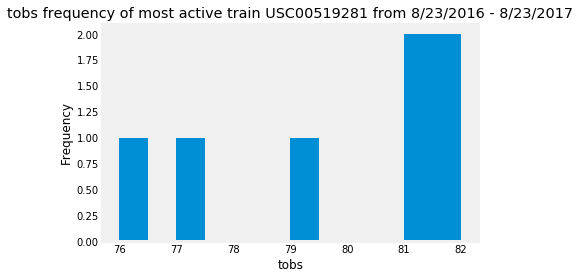

In [27]:
# Plot results using a histogram with bins=12 (Tobs vs. frequency)
plt.hist(tobs_df['tobs'], bins=12)
plt.xlabel('tobs')
plt.ylabel('Frequency')
plt.title('tobs frequency of most active train USC00519281 from 8/23/2016 - 8/23/2017')
plt.grid()
plt.savefig("Images/station_analysis1.png")
plt.show()

In [28]:
tobs_data = []
for row in tobs_query:
    tobs_data.append(row[2])



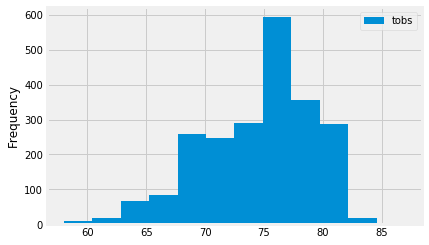

In [29]:
plt.hist(tobs_data, bins=12, label='tobs')
plt.ylabel("Frequency")
plt.legend()
plt.savefig("Images/station_analysis2.png")
plt.show()


In [30]:
### CLIMATE APP

In [ ]:

app = Flask(__name__)


@app.route("/")
def homepage():
    """List of all returnable API routes."""
    
# all my returns routes are here
    return(
        f"Available Routes:<br/>"
       

        f"/api/v1.0/precipitation<br/>"
        f"- Query dates and temperature from the last year. <br/>"

        f"/api/v1.0/stations<br/>"
        f"- Returns a json list of stations. <br/>"

        f"/api/v1.0/tobs<br/>"
        f"- Returns list of Temperature Observations(tobs) for previous year. <br/>"

        f"/api/v1.0/yyyy-mm-dd/<br/>"
        f"- Returns an Average, Max, and Min temperature for given date.<br/>"

        f"/api/v1.0/yyyy-mm-dd/yyyy-mm-dd/<br/>"
        f"- Returns an Aveage Max, and Min temperature for given period.<br/>"
    )

@app.route("/api/v1.0/precipitation")
def precipitation():
    """Return Dates and Temp from the last year."""
    results = session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.date <= "2016-01-01", Measurement.date >= "2016-01-01").\
        all()

    #create the JSON objects
    precipitation_list = [results]

    return jsonify(precipitation_list)

@app.route("/api/v1.0/stations")
def stations():
    """Return a list of stations"""
    results = session.query(Station.name, Station.station, Station.elevation).all()

    #create dictionary for JSON
    station_list = []
    for result in results:
        row = {}
        row['name'] = result[0]
        row['station'] = result[1]
        row['elevation'] = result[2]
        station_list.append(row)
    return jsonify(station_list)

@app.route("/api/v1.0/tobs")
def temp_obs():
    """Return a list of tobs for the previous year"""
    results = session.query(Station.name, Measurement.date, Measurement.tobs).\
        filter(Measurement.date >= "2016-01-01", Measurement.date <= "2017-01-01").\
        all()

    #create json, perhaps use dictionary
    tobs_list = []
    for result in results:
        row = {}
        row["Date"] = result[1]
        row["Station"] = result[0]
        row["Temperature"] = int(result[2])
        tobs_list.append(row)

    return jsonify(tobs_list)

@app.route('/api/v1.0/<date>/')
#correct route to input: /api/v1.0/yyyy-mm-dd/
def given_date(date):
    """Return the average temp, max temp, and min temp for the date"""
    results = session.query(Measurement.date, func.avg(Measurement.tobs), func.max(Measurement.tobs), func.min(Measurement.tobs)).\
        filter(Measurement.date == date).all()

#Create JSON
    data_list = []
    for result in results:
        row = {}
        row['Date'] = result[0]
        row['Average Temperature'] = float(result[1])
        row['Highest Temperature'] = float(result[2])
        row['Lowest Temperature'] = float(result[3])
        data_list.append(row)

    return jsonify(data_list)

@app.route('/api/v1.0/<start_date>/<end_date>/')
#Correct route to input: /api/v1.0/yyyy-mm-dd/yyyy-mm-dd/
def query_dates(start_date, end_date):
    """Return the avg, max, min, temp over a specific time period"""
    results = session.query(func.avg(Measurement.tobs), func.max(Measurement.tobs), func.min(Measurement.tobs)).\
        filter(Measurement.date >= start_date, Measurement.date <= end_date).all()

    data_list = []
    for result in results:
        row = {}
        row["Start Date"] = start_date
        row["End Date"] = end_date
        row["Average Temperature"] = float(result[0])
        row["Highest Temperature"] = float(result[1])
        row["Lowest Temperature"] = float(result[2])
        data_list.append(row)
    return jsonify(data_list)


if __name__ == '__main__':
    from werkzeug.serving import run_simple
    run_simple('localhost', 9000, app)

 * Running on http://localhost:9000/ (Press CTRL+C to quit)
127.0.0.1 - - [11/Aug/2018 09:17:12] "GET /api/v1.0/precipitation HTTP/1.1" 200 -
[2018-08-11 09:17:39,695] ERROR in app: Exception on /api/v1.0/<date>/ [GET]
Traceback (most recent call last):
  File "/anaconda3/envs/PythonData/lib/python3.6/site-packages/flask/app.py", line 2292, in wsgi_app
    response = self.full_dispatch_request()
  File "/anaconda3/envs/PythonData/lib/python3.6/site-packages/flask/app.py", line 1815, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/anaconda3/envs/PythonData/lib/python3.6/site-packages/flask/app.py", line 1718, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/anaconda3/envs/PythonData/lib/python3.6/site-packages/flask/_compat.py", line 35, in reraise
    raise value
  File "/anaconda3/envs/PythonData/lib/python3.6/site-packages/flask/app.py", line 1813, in full_dispatch_request
    rv = self.dispatch_request()
  File "/anaconda3/envs/PythonDa

127.0.0.1 - - [11/Aug/2018 09:21:55] "GET /api/v1.0/2016-2-2/ HTTP/1.1" 500 -
[2018-08-11 09:22:49,388] ERROR in app: Exception on /api/v1.0/yyyy-mm-dd/ [GET]
Traceback (most recent call last):
  File "/anaconda3/envs/PythonData/lib/python3.6/site-packages/flask/app.py", line 2292, in wsgi_app
    response = self.full_dispatch_request()
  File "/anaconda3/envs/PythonData/lib/python3.6/site-packages/flask/app.py", line 1815, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/anaconda3/envs/PythonData/lib/python3.6/site-packages/flask/app.py", line 1718, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/anaconda3/envs/PythonData/lib/python3.6/site-packages/flask/_compat.py", line 35, in reraise
    raise value
  File "/anaconda3/envs/PythonData/lib/python3.6/site-packages/flask/app.py", line 1813, in full_dispatch_request
    rv = self.dispatch_request()
  File "/anaconda3/envs/PythonData/lib/python3.6/site-packages/flask/app.py", line 1799, in 